In [4]:
from google.colab import drive
drive.mount('/gdrive')
root = '/gdrive/My Drive/Colab Notebooks/data/MNIST/MNIST'

Mounted at /gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

In [18]:
# Unrotated data training set
x = loadmat(os.path.join(root, 'mnist_training_data' ))['training_data']
y = loadmat(os.path.join(root, 'mnist_training_label'))['training_label']

# Unrotated data test set
x_test = loadmat(os.path.join(root, 'mnist_test_data'))['test_data']
y_test = loadmat(os.path.join(root, 'mnist_test_label'))['test_label']

# Rotated data training set
x_rot = loadmat(os.path.join(root,'mnist-rot_training_data'))['train_data']
y_rot = loadmat(os.path.join(root,'mnist-rot_training_label'))['train_label']

# Rotated data test set
x_rot_test = loadmat(os.path.join(root,'mnist-rot_test_data'))['test_data']
y_rot_test = loadmat(os.path.join(root,'mnist-rot_test_label'))['test_label']

### Now we will merge the training and test data from the unrotated and rotated datasets to obtain a single larger training and testing sample

In [19]:
x_rot_test.shape

(10000, 28, 28)

In [20]:
# Merged training data and labels
x_tr=np.concatenate((x,x_rot.reshape((12000,784))))
y_tr=np.concatenate((y,y_rot.T))

# Merged test data and labels
x_t = np.concatenate((x_test,x_rot_test.reshape((10000,784))))
y_t = np.concatenate((y_test,y_rot_test.T))

In [21]:
# Randomly shuffling the arrangement of the data and labels
shuffled_indices=np.random.permutation(len(x_tr))
x_tr=x_tr[shuffled_indices]
y_tr=y_tr[shuffled_indices]

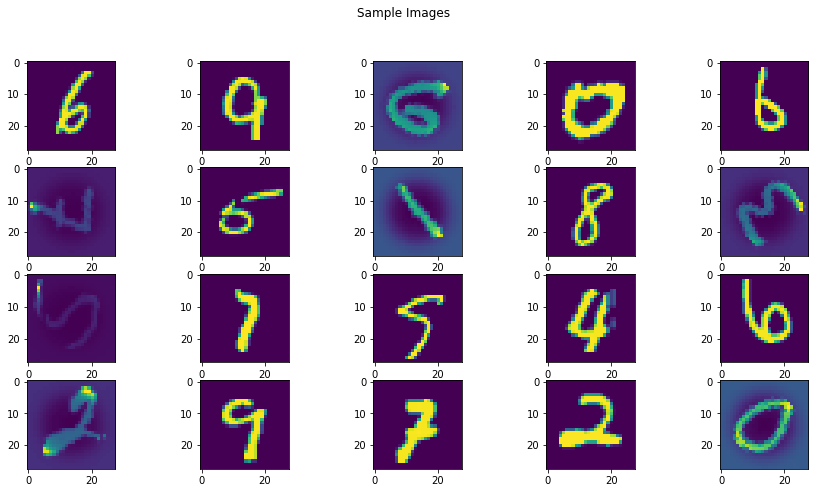

In [28]:
# Plotting a few random observations
j=1
plt.figure(figsize=(15,7.5))
for i in np.random.randint(0,len(x_tr),20):
  plt.suptitle('Sample Images')
  plt.subplot(4,5,j)
  plt.imshow(np.reshape(x_tr[i],(28,28)))
  j=j+1

## We will now apply LDA and QDA models to predict the labels of the test data

# Linear Discriminant Analysis

In [29]:
# Required packages
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [30]:
# Defining the linear discriminant model
lin_clf=LinearDiscriminantAnalysis()

In [31]:
# Fitting the given training data
lin_clf.fit(x_tr,y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [32]:
y_tr_lda=lin_clf.predict(x_tr) # Predicting the labels for the observations on the training set
y_pred_lda=lin_clf.predict(x_t) # Predicting the labels for the observations in the test set

In [33]:
print(f'The training accuracy of the LDA model is:',metrics.accuracy_score(y_tr,y_tr_lda))
print(f'The Test accuracy of the LDA model is:',metrics.accuracy_score(y_t,y_pred_lda))

The training accuracy of the LDA model is: 0.7299516129032259
The Test accuracy of the LDA model is: 0.5841


Note that the test accuracy for predicting the test data of rotated dataset when the model was built using unrotated data set (in the notebook <a href="https://github.com/shubha3/Senior-Mentorship-Summer-Project-2021/blob/main/Application-on-Unrotated-data/LDA-QDA/MNIST_LDA_QDA.ipynb">here</a>) was 9.39%. Here when model is build using both types of data, the test accuracy is much higher.<br><br>
However, the test accuracy when predicting unrotated data set using the same model was 87.22% whereas here it is merely 58.41%. This drop can be attributed to the following fact:<ul><li>The unrotated training set has 50000 observations and that of rotated is 12000. Thus rotated data accounts for 19.35% of the training set used for model building</li>
<li>The unrotated test set has 10000 observations which is same as the number of observations from the rotated test set. Thus rotated data accounts for 50% of the total number of test set used in prediction.</li><li> Thus since we have an evident lack of rotated data used in fitting the model, we end up misclassifying most of the data in the test set which has a higher proportion of rotated observations</li></ul>

# Quadratic Discriminant Analysis

In [42]:
# Required packages
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [45]:
# Defining the linear discriminant model
quad_clf=QuadraticDiscriminantAnalysis()

In [47]:
len(y_tr)

62000

In [49]:
# Fitting the data
quad_clf.fit(x_tr,y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [51]:
y_tr_qda=quad_clf.predict(x_tr) # Predicting the labels for the observations on the training set
y_pred_qda=quad_clf.predict(x_t) # Predicting the labels for the observations in the test set

In [52]:
print(f'The train accuracy of QDA model is:',metrics.accuracy_score(y_tr,y_tr_qda))
print(f'The test accuracy  of QDA model is:',metrics.accuracy_score(y_t,y_pred_qda))

The train accuracy of QDA model is: 0.31690322580645164
The test accuracy  of QDA model is: 0.17125


Apart from the indication that the data (merged along with unrotated data) might not be inherently linearly separable, which has been discussed in the other notebook <a href="https://github.com/shubha3/Senior-Mentorship-Summer-Project-2021/blob/main/Application-on-Unrotated-data/LDA-QDA/MNIST_LDA_QDA.ipynb">here</a>, we also can conclude similarly as the one done in case of LDA that a disproportionate existence of rotated data in training and test observations yields a lower test accuracy that the one observed in the other notebook (modelled using unrotated data and tested on unrotated data, <a href="https://github.com/shubha3/Senior-Mentorship-Summer-Project-2021/blob/main/Application-on-Unrotated-data/LDA-QDA/MNIST_LDA_QDA.ipynb">here</a>).<br><br> However since we are training the model using rotated data, we get a higher test accuracy of 17.13% than 9.97% obtained when rotated observations were subject to prediction using model training on unrotated data.

# Applying LDA and QDA using Principal Components

We first standardize the features

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_tr)
# Apply transform to both the training set
x_sc = scaler.transform(x_tr)

# Fit on test set only.
scaler.fit(x_t)
# Apply transform to both the training set
x_t_sc = scaler.transform(x_t)

We will be using that many principal components which account for 90% of the variability in the feature space.

In [58]:
from sklearn.decomposition import PCA
pca=PCA(0.9)
p_comp=pca.fit_transform(x_sc)
print(f'The number of principal components accounting 90% of the variability in our feature space:',pca.n_components_)

The number of principal components accounting 90% of the variability in our feature space: 200


Thus we will be using the first 200 principal components in our new model.

In [60]:
lin_clf=LinearDiscriminantAnalysis()
quad_clf=QuadraticDiscriminantAnalysis()
lin_clf.fit(p_comp,y_tr)  # Fitting the LDA model
quad_clf.fit(p_comp,y_tr) # Fitting the QDA model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [62]:
# We fix the loadings in the direction of the training data feature space principal components
pca=PCA(n_components=200)
p_comp=pca.fit(x_sc)

In [64]:
x_test_pc=pca.transform(x_t_sc)   # Evaluating the first 200 principal components of test feature space

In [66]:
y_pc_lda_test=lin_clf.predict(x_test_pc)    # Predicting the labels of test data set using LDA model
y_pc_qda_test=quad_clf.predict(x_test_pc)   # Predicting the labels of test data set using QDA model

In [67]:
print(f'The test accuracy of LDA using first 200 principal components is', metrics.accuracy_score(y_t,y_pc_lda_test))
print(f'The test accuracy of QDA using first 200 principal components is', metrics.accuracy_score(y_t,y_pc_qda_test))

The test accuracy of LDA using first 200 principal components is 0.5676
The test accuracy of QDA using first 200 principal components is 0.1498


We see that using the first 200 principal components the LDA model is not affected much (though the test accuracy decreases slightly). The QDA model performs badly as seen in the regular model as well as the merged dataset cases.